In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy
from keras.optimizers import Adam
import keras
from matplotlib import pyplot
from keras.callbacks import EarlyStopping
import pandas as pd 
from sklearn.preprocessing import LabelEncoder 
import pandas_ta as ta

      Effective date  S&P Global High Yield Sukuk Index
0            41698.0                             102.12
1            41701.0                             102.41
2            41702.0                             102.12
3            41703.0                             102.17
4            41704.0                             102.08
...              ...                                ...
2592         45349.0                             171.60
2593         45350.0                             171.65
2594         45351.0                             171.89
2595         45352.0                             172.00
2596         45355.0                             171.91

[2597 rows x 2 columns]


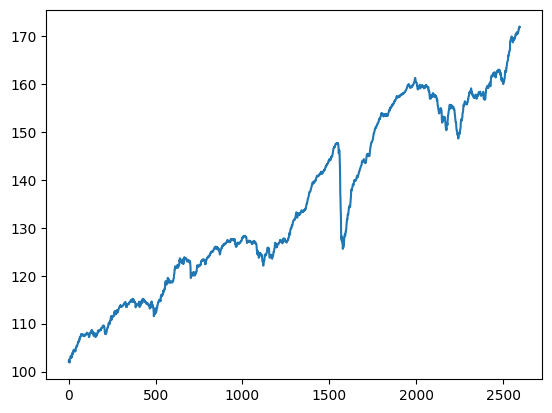

In [7]:
# Load data
data = pd.read_csv("S&P Global High Yield Sukuk Index.csv")
print(data)
# Extract features (date) and target (price)
X = data["Effective date"]
y = data["S&P Global High Yield Sukuk Index"]
pyplot.plot(data['S&P Global High Yield Sukuk Index'], label='Effective date')
pyplot.show()

In [29]:
# Adding indicators
data['RSI']=ta.rsi(data["S&P Global High Yield Sukuk Index"], length=15)
data['EMAF']=ta.ema(data["S&P Global High Yield Sukuk Index"], length=20)
data['EMAM']=ta.ema(data["S&P Global High Yield Sukuk Index"], length=100)
data['EMAS']=ta.ema(data["S&P Global High Yield Sukuk Index"], length=150)
data['Next_Price'] = data["S&P Global High Yield Sukuk Index"].shift(-1)

#data['Target'] = data['Adj Close']-data.Open
#data['Target'] = data['Target'].shift(-1)
#data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]
#data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)

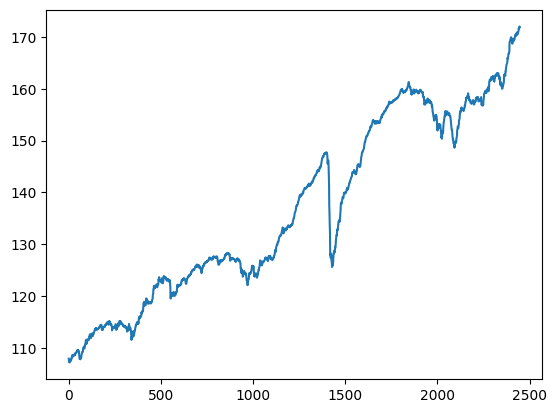

In [30]:
pyplot.plot(data['Next_Price'], label='Effective date')
pyplot.show()

In [41]:
data_set = data.iloc[:, :]#.values
pd.set_option('display.max_columns', None)

data.iloc[:, 2:8].head(20)

,S&P Global High Yield Sukuk Index,RSI,EMAF,EMAM,EMAS,Next_Price
0,108.05,52.002455,107.972182,107.061120,106.318333,107.91
1,107.91,48.694004,107.966259,107.077930,106.339415,107.61
2,107.61,42.487857,107.932330,107.088466,106.356244,107.36
3,107.36,38.146879,107.877822,107.093843,106.369539,107.44
4,107.44,40.240243,107.836125,107.100697,106.383717,107.22
5,107.22,36.591377,107.777446,107.103060,106.394794,107.18
6,107.18,35.956234,107.720547,107.104583,106.405194,107.40
7,107.40,41.899175,107.690019,107.110433,106.418370,107.40
8,107.40,41.899175,107.662398,107.116167,106.431372,107.42
9,107.42,42.456432,107.639312,107.122184,106.444466,107.45


In [47]:


# Extract features (date) and target (price)
X = data_set.iloc[:, 2:7]
y = data_set["Next_Price"]

# Preprocess date data (consider converting to numerical format)
# This example uses string representation for simplicity
#X = pd.to_datetime(X)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [108]:
model = Sequential()
model.add(Dense(256, activation="relu", input_dim=5))
model.add(Dense(128, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))

# Since the regression is performed, a Dense layer containing a single neuron with a linear activation function.
# Typically ReLu-based activation are used but since it is performed regression, it is needed a linear activation.
model.add(Dense(1, activation="linear"))

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9)

# Compile model: The model is initialized with the Adam optimizer and then it is compiled.
model.compile(loss='mean_squared_error', optimizer= Adam(learning_rate=lr_schedule))

# Patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=X.shape[0], verbose=2, callbacks=[es])

# Calculate predictions
PredTestSet = model.predict(X_train)
PredValSet = model.predict(X_test)

# Save predictions
numpy.savetxt("trainresults.csv", PredTestSet, delimiter=",")
numpy.savetxt("valresults.csv", PredValSet, delimiter=",")

Epoch 1/1000
1/1 - 1s - loss: 18710.9824 - val_loss: 15194.4521 - 1s/epoch - 1s/step
Epoch 2/1000
1/1 - 0s - loss: 15135.8311 - val_loss: 14098.6758 - 38ms/epoch - 38ms/step
Epoch 3/1000
1/1 - 0s - loss: 14059.1924 - val_loss: 12964.5625 - 39ms/epoch - 39ms/step
Epoch 4/1000
1/1 - 0s - loss: 12911.7783 - val_loss: 11724.8350 - 39ms/epoch - 39ms/step
Epoch 5/1000
1/1 - 0s - loss: 11675.5703 - val_loss: 10261.8242 - 33ms/epoch - 33ms/step
Epoch 6/1000
1/1 - 0s - loss: 10223.5078 - val_loss: 8623.8584 - 36ms/epoch - 36ms/step
Epoch 7/1000
1/1 - 0s - loss: 8596.3076 - val_loss: 7130.0239 - 42ms/epoch - 42ms/step
Epoch 8/1000
1/1 - 0s - loss: 7109.7539 - val_loss: 5674.9561 - 34ms/epoch - 34ms/step
Epoch 9/1000
1/1 - 0s - loss: 5657.0142 - val_loss: 4313.5430 - 33ms/epoch - 33ms/step
Epoch 10/1000
1/1 - 0s - loss: 4295.6221 - val_loss: 3097.8838 - 34ms/epoch - 34ms/step
Epoch 11/1000
1/1 - 0s - loss: 3083.9912 - val_loss: 2046.3420 - 34ms/epoch - 34ms/step
Epoch 12/1000
1/1 - 0s - loss: 203

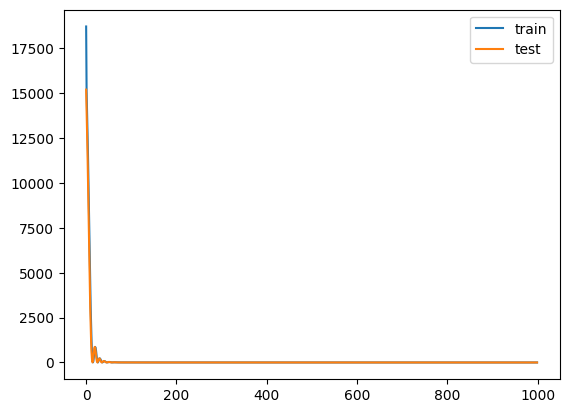

In [109]:

# Plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Training Set R-Square= 0.997350085635394


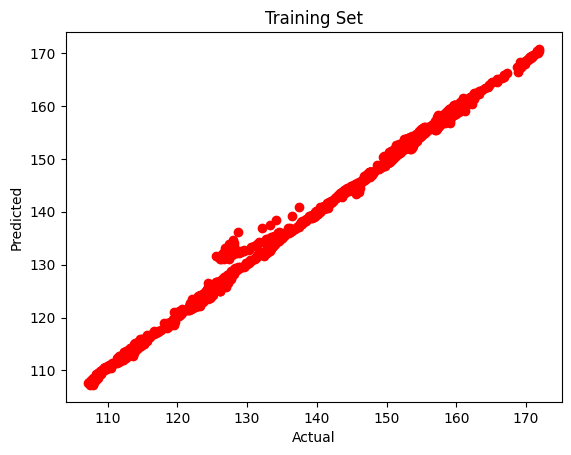

In [111]:

# Plot actual vs prediction for training set
TestResults = numpy.genfromtxt("trainresults.csv", delimiter=",")
plt.plot(y_train,TestResults,'ro')
plt.title('Training Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Compute R-Square value for training set
TestR2Value = r2_score(y_train,TestResults)
print("Training Set R-Square=", TestR2Value)

77/77 [==============================] - 0s 1ms/step


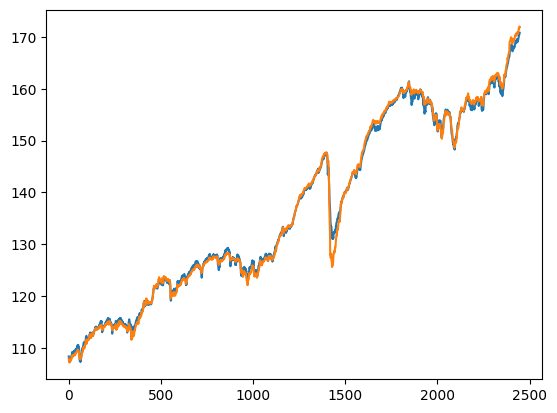

In [119]:
pyplot.plot(model.predict(data_set.iloc[:, 2:7]), label='Effective date')
pyplot.plot(data_set["Next_Price"], label='Effective date')

pyplot.show()